In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib

In [2]:
weight_path = '/usr/xtmp/zg78/proto_proj/saved_models/eeg_model/07-25-2022_17-11_random=44_class_weighted_m_OFF_identity_CVall_fullset_1658783472/40_2push0.6683_extracted_features/_usr_xtmp_zg78_proto_proj_data_10_train_test_split_50s__test_/last_layer_weight_T.npy'

In [3]:
!ls /usr/xtmp/zg78/proto_proj/saved_models/eeg_model/07-25-2022_17-11_random=44_class_weighted_m_OFF_identity_CVall_fullset_1658783472/40_2push0.6683_extracted_features/_usr_xtmp_zg78_proto_proj_data_10_train_test_split_50s__test_/

activations.npy
annoy_index.ann
base_multi_class_prototype_3topoverall_before_merge.csv
base_multi_class_prototype_3topoverall.csv
extracted_features.npy
labels.npy
last_layer_weight_T.npy
logits_marginlesses.npy
nbrs.npy
predictions.npy
proto_logits_marginlesses.npy
sample_ids.npy
tmp_annoy_index.ann
top_class_info.csv
X_transformed.npy


In [4]:
weight = np.load(weight_path)
weight.shape

(45, 6)

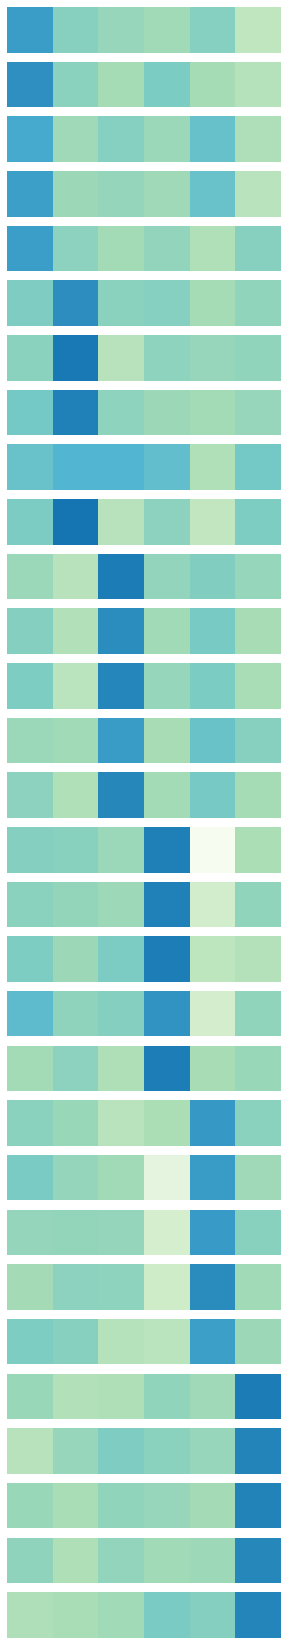

In [8]:
fig, axs = plt.subplots(30, 1, figsize=(30, 30))
for i in range(30):
    axs[i].matshow(weight[i].reshape(1, 6), cmap=matplotlib.cm.GnBu, interpolation='none', vmin=np.min(weight), vmax=np.max(weight))
    class_idxs = np.argsort(weight[i])[-1]
#     axs[i].scatter(class_idxs, 0, marker='$\checkmark$', s=200, c='k')
    axs[i].axis('off')

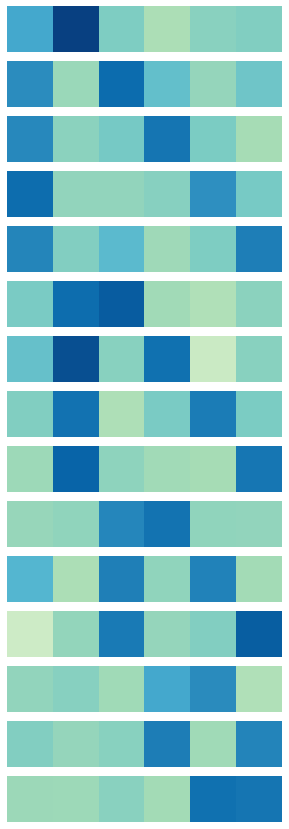

In [9]:
fig, axs = plt.subplots(15, 1, figsize=(30, 15))
for i in range(30, 45):
    axs[i-30].matshow(weight[i].reshape(1, 6), cmap=matplotlib.cm.GnBu, interpolation='none', vmin=np.min(weight), vmax=np.max(weight))
    class_idxs = np.argsort(weight[i])[-2:]
#     axs[i-30].scatter(class_idxs[0], 0, marker='$\checkmark$', s=200, c='k')
#     axs[i-30].scatter(class_idxs[1], 0, marker='$\checkmark$', s=200, c='k')
    
    axs[i-30].axis('off')
    
    

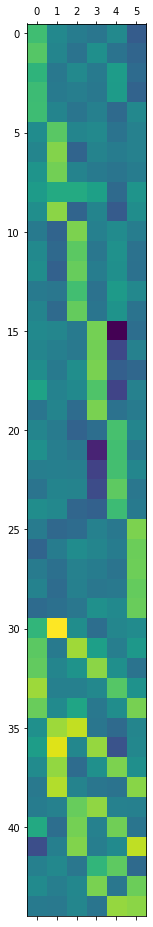

In [9]:
plt.matshow(weight)

In [5]:
classes = ['other', 'seizure', 'lpd', 'gpd', 'lrda', 'grda']

In [7]:
for i in range(45):
    w = weight[i]
    if i <= 29:
        class_idxs = np.argsort(w)[-1]
        print('Prototype', i+1, ':', classes[class_idxs])
    else:
        class_idxs = np.argsort(w)[-2:]
        print('Prototype',i+1, ':', [classes[j] for j in class_idxs])

Prototype 1 : other
Prototype 2 : other
Prototype 3 : other
Prototype 4 : other
Prototype 5 : other
Prototype 6 : seizure
Prototype 7 : seizure
Prototype 8 : seizure
Prototype 9 : lpd
Prototype 10 : seizure
Prototype 11 : lpd
Prototype 12 : lpd
Prototype 13 : lpd
Prototype 14 : lpd
Prototype 15 : lpd
Prototype 16 : gpd
Prototype 17 : gpd
Prototype 18 : gpd
Prototype 19 : gpd
Prototype 20 : gpd
Prototype 21 : lrda
Prototype 22 : lrda
Prototype 23 : lrda
Prototype 24 : lrda
Prototype 25 : lrda
Prototype 26 : grda
Prototype 27 : grda
Prototype 28 : grda
Prototype 29 : grda
Prototype 30 : grda
Prototype 31 : ['other', 'seizure']
Prototype 32 : ['other', 'lpd']
Prototype 33 : ['other', 'gpd']
Prototype 34 : ['lrda', 'other']
Prototype 35 : ['other', 'grda']
Prototype 36 : ['seizure', 'lpd']
Prototype 37 : ['gpd', 'seizure']
Prototype 38 : ['lrda', 'seizure']
Prototype 39 : ['grda', 'seizure']
Prototype 40 : ['lpd', 'gpd']
Prototype 41 : ['lrda', 'lpd']
Prototype 42 : ['lpd', 'grda']
Prototy

In [25]:
'''
P31 - experts say Other, model uses as a Other/LPD
P19 - model GPD/LPD by model, experts say mostly GPD
P39 - model GPD/LPD by model, experts say mostly GPD
P20: Model says LRDA, votes split between LPD and LRDA
P42: experts say GPD, model says LRDA/Other?
P40: experts say LPD/LRDA
P26 other according the experts, GRDA by model
P43: GPD/GRDA crossover
P44: LRDA/GRDA
P34: Other/GRDA according to experts
P33: Other/LRDA by votes
P41: votes split mostly Other
P41: 4 for LPD 4 for GRDA
P32: LPD, GPD, Other
P0: other
P30: Other, with some seizure
'''

'\nP12 - LPD\nP31 - experts say Other, model uses as a Other/LPD\nP19 - model GPD/LPD by model, experts say mostly GPD\nP39 - model GPD/LPD by model, experts say mostly GPD\nP20: Model says LRDA, votes split between LPD and LRDA\nP42: experts say GPD, model says LRDA/Other?\nP40: experts say LPD/LRDA\nP26 other according the experts, GRDA by model\nP43: GPD/GRDA crossover\nP44: LRDA/GRDA\nP34: Other/GRDA according to experts\nP33: Other/LRDA by votes\nP41: votes split mostly Other\nP41: 4 for LPD 4 for GRDA\nP32: LPD, GPD, Other\nP0: other\nP30: Other, with some seizure\n'